## BUILDING MODELS

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats

#sns.set_style("whitegrid")
#sns.set_context("paper")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### Load Dataset

In [3]:
df = pd.read_csv('Training Dataset.csv', index_col=0)
df.head()

,Employee Code,Organization,Department or Branch,Functional Title,Rank,Employee Status,Performance_Rating,Tenure,Total Training Hours,Core Training Hours,Function Specific Training Hours,Leadership & Management Training Hours,External Training Hours,Internal Training Hours,Budget per Trainee
0,13-0101,SHARED SERVICES,Marketing Department,Marketing Consumer Insights & Activation,Mgr,Regular,2.95,17,46.0,2.0,0.0,44.0,0.0,46.0,40000
1,92-0301,RETAIL,Operations Department,Operations Reinsurance Administration,Mgr,Regular,3.30,15,18.0,2.0,0.0,16.0,0.0,18.0,40000
2,06-0801,SHARED SERVICES,IT Life Applications Development Section,IT Life Applications Development Programming M...,Mgr,Regular,2.94,10,18.0,2.0,0.0,16.0,0.0,18.0,40000
3,11-0107,RETAIL,Microinsurance Department,Microinsurance Accounts,Supv,Regular,2.91,17,29.0,5.0,0.0,24.0,0.0,29.0,20000
4,CP161108,RETAIL,Microinsurance Department,Partner Relationship Staff Assistant,Staff II,Regular,2.65,2,2.0,2.0,0.0,0.0,0.0,2.0,10000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 567
Data columns (total 15 columns):
Employee Code                             565 non-null object
Organization                              565 non-null object
Department or Branch                      565 non-null object
Functional Title                          565 non-null object
Rank                                      565 non-null object
Employee Status                           565 non-null object
Performance_Rating                        565 non-null float64
Tenure                                    565 non-null int64
Total Training Hours                      565 non-null float64
Core Training Hours                       565 non-null float64
Function Specific Training Hours          565 non-null float64
Leadership & Management Training Hours    565 non-null float64
External Training Hours                   565 non-null float64
Internal Training Hours                   565 non-null float64
Budget per Trainee   

In [6]:
df.describe()

,Performance_Rating,Tenure,Total Training Hours,Core Training Hours,Function Specific Training Hours,Leadership & Management Training Hours,External Training Hours,Internal Training Hours,Budget per Trainee
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,2.902168,10.223009,16.254867,5.670796,2.619469,7.964602,1.876106,14.378761,29415.929204
std,0.305902,7.158774,15.593762,8.508107,6.431746,13.299556,6.466406,14.323822,23456.132915
min,1.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,10000.000000
50%,2.960000,10.000000,12.000000,2.000000,0.000000,0.000000,0.000000,8.000000,20000.000000
75%,3.100000,15.000000,24.000000,5.000000,0.000000,16.000000,0.000000,21.000000,40000.000000
max,3.500000,27.000000,82.000000,56.000000,80.000000,64.000000,80.000000,68.000000,100000.000000


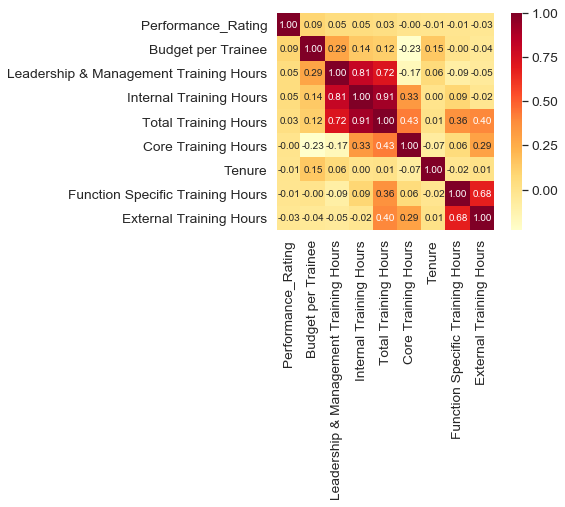

In [9]:
#correlation matrix
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Performance_Rating')['Performance_Rating'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'YlOrRd', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Data Prepration: Feature Scaling

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


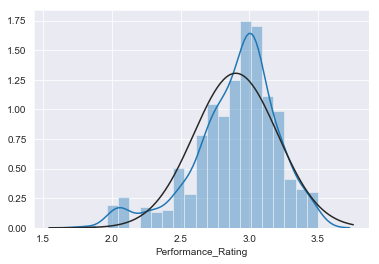

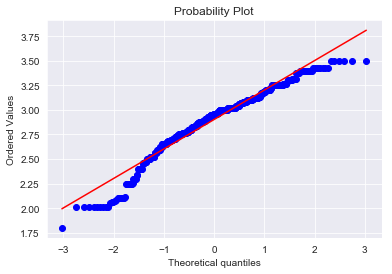

In [4]:
#histogram and normal probability plot
sns.set_style('darkgrid')

sns.distplot(df['Performance_Rating'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Performance_Rating'], plot=plt)

In [24]:
scaler = StandardScaler()

In [25]:
#Create dataframe of only numeric (integer & float) features
df_num = df.select_dtypes(include=['int64','float64'])

In [26]:
numerical_features = df_num.columns
df_scaled = df.copy()
df_scaled.loc[:, numerical_features]  = scaler.fit_transform(df.loc[:, numerical_features])

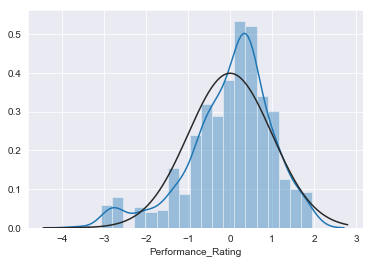

In [27]:
sns.distplot(df_scaled['Performance_Rating'], fit=norm);

In [9]:
scaler_r = RobustScaler()

In [10]:
numerical_features = df_num.columns
df_scaled_r = df.copy()
df_scaled_r.loc[:, numerical_features]  = scaler_r.fit_transform(df.loc[:, numerical_features])

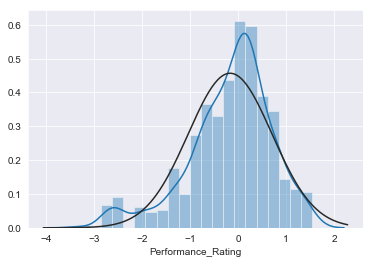

In [11]:
sns.distplot(df_scaled_r['Performance_Rating'], fit=norm);

### Build the Model

#### Linear Regression

In [10]:
#Split the dataset to training and testing set

df_train, df_test = train_test_split(df, test_size=0.3, random_state=35)
x_train = df_train[['Total Training Hours', 'Tenure']]
y_train = df_train['Performance_Rating']

x_test = df_test[['Total Training Hours', 'Tenure']]
y_test = df_test['Performance_Rating']

print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

((395, 2), (395,), (170, 2), (170,))


In [11]:
# Linear Regression

lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
pd.DataFrame(lr.coef_, index=x_train.columns)

,0
Total Training Hours,0.001409
Tenure,-0.000591


## Validate the Model

In [13]:
# Predict the values
y_pred = lr.predict(x_test)

In [14]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2: %.2f") %r2
print("mae: %.2f") %mae
print("mse: %.2f") %mse
print("rmse: %.2f") %rmse

r2: -3.60
mae: 0.24
mse: 0.09
rmse: 0.31


In [15]:
#Get a table of the results
df_results = pd.DataFrame(y_test)
df_results['Predicted'] = y_pred
df_results.head()

,Performance_Rating,Predicted
448,3.02,2.875186
425,2.57,2.868640
157,2.89,2.866277
114,3.25,2.893089
354,2.52,2.907178


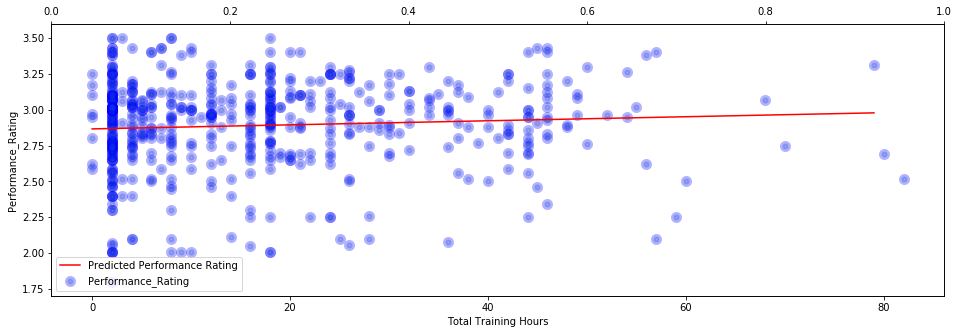

In [26]:
#Visualize the Results

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

x_test_sort_total = x_test['Total Training Hours'].sort_values()
#x_test_sort_radio = x_test.Radio.sort_values()
predict_sort = pd.Series(y_pred, index = x_test.index).sort_values()

ax1.scatter(df['Total Training Hours'], df['Performance_Rating'],edgecolor='b', alpha=0.3, linewidths=5)
#ax2.scatter(df["Radio"], df["Sales"], edgecolor="g", alpha=0.3, linewidths=5)

ax1.plot(x_test_sort_total, predict_sort, color='r', label = 'Predicted Performance Rating',)
#ax2.plot(x_test_sort_radio, predict_sort, color="y", label = "Predicted Sales on Radio")


ax1.set_xlabel('Total Training Hours')
ax1.set_ylabel('Performance_Rating')
#ax2.set_xlabel("Radio")
ax1.legend(loc='lower left')
#ax2.legend(loc='lower left')
plt.show()

### Random Forest Regression

In [33]:
df_x = df[['Total Training Hours']]
df_class = df['Performance_Rating']

In [35]:
#Normalizing / Scaling within cross validation
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import ensemble

regr = make_pipeline(StandardScaler(), ensemble.RandomForestRegressor(n_estimators=20, random_state = 35))

scores = cross_val_score(regr, df_x, df_class, cv=5,scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(regr, df_x, df_class, cv=5, scoring='r2')

In [36]:
print("Avg MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Avg R2: %0.2f (+/- %0.2f)" % (scores_r2.mean(), scores_r2.std() * 2))

Avg MSE: -0.10 (+/- 0.02)
Avg R2: -0.12 (+/- 0.13)


### Lassso Regularization

In [16]:
from sklearn.linear_model import Lasso, Ridge

In [17]:
lasso_model = linear_model.Lasso()
lasso_model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
# Predict the values
y_pred = lasso_model.predict(x_test)

In [19]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2: %.2f") %r2
print("mae: %.2f") %mae
print("mse: %.2f") %mse
print("rmse: %.2f") %rmse

r2: -2.24
mae: 0.24
mse: 0.09
rmse: 0.30


In [20]:
lasso_model = linear_model.Lasso(alpha = .000000001)
lasso_model.fit(x_train, y_train)

Lasso(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
# Predict the values
y_pred = lasso_model.predict(x_test)

In [22]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2: %.2f") %r2
print("mae: %.2f") %mae
print("mse: %.2f") %mse
print("rmse: %.2f") %rmse

r2: -3.60
mae: 0.24
mse: 0.09
rmse: 0.31


### Ridge Regularization

In [23]:
ridge_model = linear_model.Ridge()
ridge_model.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
# Predict the values
y_pred = ridge_model.predict(x_test)

In [25]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2: %.2f") %r2
print("mae: %.2f") %mae
print("mse: %.2f") %mse
print("rmse: %.2f") %rmse

r2: -3.60
mae: 0.24
mse: 0.09
rmse: 0.31


In [26]:
ridge_model = linear_model.Ridge(alpha = .00001)
ridge_model.fit(x_train, y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
# Predict the values
y_pred = ridge_model.predict(x_test)

In [28]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("r2: %.2f") %r2
print("mae: %.2f") %mae
print("mse: %.2f") %mse
print("rmse: %.2f") %rmse

r2: -3.60
mae: 0.24
mse: 0.09
rmse: 0.31
